In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Employers_data.csv")
df.head()

,Employee_ID,Name,Age,Gender,Department,Job_Title,Experience_Years,Education_Level,Location,Salary
0,1,Merle Ingram,24,Female,Engineering,Engineer,1,Master,Austin,90000
1,2,John Mayes,56,Male,Sales,Executive,33,Master,Seattle,195000
2,3,Carlos Wille,21,Male,Engineering,Intern,1,Bachelor,New York,35000
3,4,Michael Bryant,30,Male,Finance,Analyst,9,Bachelor,New York,75000
4,5,Paula Douglas,25,Female,HR,Analyst,2,Master,Seattle,70000


In [3]:
df.shape

(10000, 10)

In [4]:
df.isna().sum()

,0
Employee_ID,0
Name,0
Age,0
Gender,0
Department,0
Job_Title,0
Experience_Years,0
Education_Level,0
Location,0
Salary,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Employee_ID       10000 non-null  int64 
 1   Name              10000 non-null  object
 2   Age               10000 non-null  int64 
 3   Gender            10000 non-null  object
 4   Department        10000 non-null  object
 5   Job_Title         10000 non-null  object
 6   Experience_Years  10000 non-null  int64 
 7   Education_Level   10000 non-null  object
 8   Location          10000 non-null  object
 9   Salary            10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [6]:
df.describe()

,Employee_ID,Age,Experience_Years,Salary
count,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,35.455900,12.370900,115381.500000
std,2886.89568,10.000213,9.148951,46066.139047
min,1.00000,21.000000,0.000000,25000.000000
25%,2500.75000,27.000000,5.000000,70000.000000
50%,5000.50000,34.000000,10.000000,120000.000000
75%,7500.25000,43.000000,19.000000,150000.000000
max,10000.00000,60.000000,37.000000,215000.000000


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['Age','Experience_Years','Salary']] = scaler.fit_transform(df[['Age','Experience_Years','Salary']])
df.head()

,Employee_ID,Name,Age,Gender,Department,Job_Title,Experience_Years,Education_Level,Location,Salary
0,1,Merle Ingram,0.076923,Female,Engineering,Engineer,0.027027,Master,Austin,0.342105
1,2,John Mayes,0.897436,Male,Sales,Executive,0.891892,Master,Seattle,0.894737
2,3,Carlos Wille,0.000000,Male,Engineering,Intern,0.027027,Bachelor,New York,0.052632
3,4,Michael Bryant,0.230769,Male,Finance,Analyst,0.243243,Bachelor,New York,0.263158
4,5,Paula Douglas,0.102564,Female,HR,Analyst,0.054054,Master,Seattle,0.236842


In [12]:
cor = df[['Age','Experience_Years','Salary']].corr()
cor

,Age,Experience_Years,Salary
Age,1.000000,0.982299,0.927958
Experience_Years,0.982299,1.000000,0.898025
Salary,0.927958,0.898025,1.000000


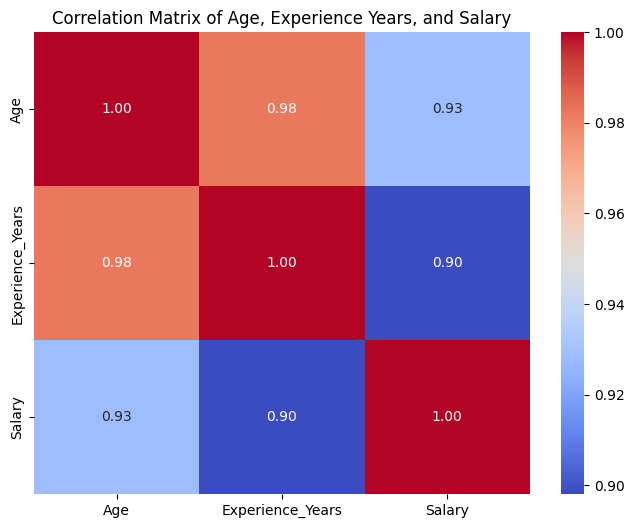

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(cor, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Age, Experience Years, and Salary')
plt.show()

In [18]:
x = df[['Age','Experience_Years']]
y = df['Salary']

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [40]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [41]:
r2 = r2_score(y_test,y_pred)
r2

0.8681105790538134

In [42]:
mse = mean_squared_error(y_test,y_pred)
mse

0.007700230468309494

In [43]:
print("R-squared: ",r2*100)
print("Mean Squared Error: ",mse*100)

R-squared:  86.81105790538133
Mean Squared Error:  0.7700230468309495


In [44]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

In [45]:
r2_2 = r2_score(y_test,y_pred)
r2_2

0.9135820894517337

In [46]:
mse_2 = mean_squared_error(y_test,y_pred)
mse_2

0.005045422316949259

In [47]:
print("R-squared: ",r2_2*100)
print("Mean Squared Error: ",mse_2*100)

R-squared:  91.35820894517337
Mean Squared Error:  0.504542231694926


In [48]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)

In [52]:
r2_3 = r2_score(y_test,y_pred)
r2_3

0.9135745393385218

In [50]:
mse_3 = mean_squared_error(y_test,y_pred)
mse_3

0.005045863122674049

In [51]:
print("R-squared: ",r2_3*100)
print("Mean Squared Error: ",mse_3*100)

R-squared:  91.35745393385218
Mean Squared Error:  0.5045863122674049


In [54]:
models = {
    "Linear Regression": r2,
    "Random Forest": r2_2,
    "Decision Tree": r2_3
}
df_results = pd.DataFrame(list(models.items()), columns=["Model", "Accuracy"])
print(df_results)

               Model  Accuracy
0  Linear Regression  0.868111
1      Random Forest  0.913582
2      Decision Tree  0.913575


In [55]:
# Best Model
print("Best Model: ",max(models, key=models.get))

Best Model:  Random Forest


In [56]:
import pickle
with open("model.pkl","wb") as f:
    pickle.dump(rf,f)